In [68]:
import tensorflow as tf
import numpy as np
import pandas as pd


In [ ]:
file_path = 'MS_01_T0_TCRB.tsv'
# Read the CSV file
df = pd.read_csv(file_path, sep = "\t")
# df = pd.read_csv("https://raw.githubusercontent.com/lokalokes/deepTCR/main/1_DatasetCharacteristics/pivoted_cdr3_subset_34_patients.tsv", delimiter='\t')

In [ ]:
df = df.dropna(subset=['aminoAcid'])

In [ ]:
df.to_csv('MS_wo_na_all.csv', index=False)

In [ ]:
y = df[~df['aminoAcid'].astype(str).str.contains(r'\*')]

In [ ]:
y = df["aminoAcid"].tolist()

In [ ]:
# Apply align_imgt to each sequence and create a DataFrame
aligned_sequences = [align_imgt(seq) for seq in y]
df_aligned = pd.DataFrame(aligned_sequences)
df_aligned

,P104,P105,P106,P107,P108,P109,P110,P111,P111.1,P112.2,P112.1,P112,P113,P114,P115,P116,P117,P118
0,C,A,S,P,M,V,NA,NA,NA,NA,NA,NA,NA,H,G,Y,T,F
1,C,A,S,S,F,G,S,T,NA,NA,Y,S,N,Q,P,Q,H,F
2,C,A,S,S,S,P,P,L,D,S,S,S,I,R,N,T,E,A
3,C,A,S,S,L,A,G,T,NA,NA,NA,P,Y,N,E,Q,F,F
4,C,A,S,S,Q,A,R,G,NA,NA,NA,P,A,T,E,A,F,F
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17797,C,A,S,S,L,V,T,S,G,R,V,F,G,N,E,Q,F,F
17798,C,A,S,S,F,G,S,NA,NA,NA,NA,NA,Y,N,E,Q,F,F
17799,C,A,S,S,H,G,E,T,NA,NA,NA,S,T,D,T,Q,Y,F
17800,C,A,S,S,Q,E,E,R,G,NA,Y,S,N,Q,P,Q,H,F


In [ ]:
all_imgt_pos = [
    "P104", "P105", "P106", "P107", "P108", "P109", "P110", "P111",
    "P111.1", "P112.2", "P112.1", "P112", "P113", "P114", "P115",
    "P116", "P117", "P118"]

# Custom function to align CDR3 AA seq to IMGT
def align_imgt(CDR3):
    # Convert the string to a list of characters
    AA = list(CDR3)

    # Calculate the forward count
    N_AA_fow = len(CDR3) // 2 + len(CDR3) % 2

    # Calculate the number of NA positions
    N_AA_na = 18 - len(CDR3)

    # Adjust the list of characters
    AAmod = (
        AA[:N_AA_fow] +
        ["NA"] * N_AA_na +
        AA[N_AA_fow:]
    )

    # Assign names to the modified list
    AAmod_named = dict(zip(all_imgt_pos, AAmod))

    return AAmod_named

# Example usage
CDR3 = "CASSIRSSYEQYF"
aligned_seq = align_imgt(CDR3)
print(aligned_seq)

{'P104': 'C', 'P105': 'A', 'P106': 'S', 'P107': 'S', 'P108': 'I', 'P109': 'R', 'P110': 'S', 'P111': 'NA', 'P111.1': 'NA', 'P112.2': 'NA', 'P112.1': 'NA', 'P112': 'NA', 'P113': 'S', 'P114': 'Y', 'P115': 'E', 'P116': 'Q', 'P117': 'Y', 'P118': 'F'}


In [ ]:
### Removing the first three and the last two columns due to las of information there

In [ ]:
df_aligned_middle = df_aligned.iloc[:,3:16]

In [ ]:
encodding = {'P': 8, 'C': 19, 'D': 18, 'N': 9, 'Q': 7, 'I': 13, 'S': 5, 'W': 2, 'M': 10, 'G': 15, 'A': 20, 'R': 6, 'F': 16, 'E': 17, 'H': 14, 'T': 4, 'Y': 1, 'V': 3, 'K': 12, 'L': 11, 'NA': 0}


In [ ]:
matrix

array([[ 8, 10,  3, ..., 14, 15,  1],
       [ 5, 16, 15, ...,  7,  8,  7],
       [ 5,  5,  8, ...,  6,  9,  4],
       ...,
       [ 5, 14, 15, ..., 18,  4,  7],
       [ 5,  7, 17, ...,  7,  8,  7],
       [ 5, 11, 20, ...,  9, 17,  7]])

In [ ]:
df_encodded = df_aligned_middle.replace(encodding)
df_encodded = df_encodded.apply(pd.to_numeric, errors='coerce').fillna(0).astype(int)
matrix = df_encodded.values
np.savetxt("extended_matrix.txt", matrix, fmt='%d', delimiter=' ')

In [ ]:
df_encodded.to_csv('encodded_imgt_positions.csv', index=False)

In [69]:
# We start here again  for overfitting

# Import the data
matrix = np.loadtxt('https://raw.githubusercontent.com/lokalokes/deepTCR/main/1_DatasetCharacteristics/extended_matrix.txt')

In [70]:
matrix

array([[ 8., 10.,  3., ..., 14., 15.,  1.],
       [ 5., 16., 15., ...,  7.,  8.,  7.],
       [ 5.,  5.,  8., ...,  6.,  9.,  4.],
       ...,
       [ 5., 14., 15., ..., 18.,  4.,  7.],
       [ 5.,  7., 17., ...,  7.,  8.,  7.],
       [ 5., 11., 20., ...,  9., 17.,  7.]])

In [71]:
round(len(matrix)*0.8)

14242

In [72]:
training_set_X = matrix[:round(len(matrix)*0.8),:4]
test_set_X = matrix[round(len(matrix)*0.8):,:4]
training_set_y = matrix[:round(len(matrix)*0.8),4]
test_set_y = matrix[round(len(matrix)*0.8):,4]

In [ ]:
### Predicting the 4th position of the sequences

In [73]:

print("Input sequences (training_set_X):")
print(training_set_X)
print("\nTarget sequences (training_set_y):")
print(training_set_y)

Input sequences (training_set_X):
[[ 8. 10.  3.  0.]
 [ 5. 16. 15.  5.]
 [ 5.  5.  8.  8.]
 ...
 [ 5.  8.  6. 18.]
 [ 6. 18.  4. 13.]
 [15.  8.  3.  0.]]

Target sequences (training_set_y):
[ 0.  4. 11. ...  0. 11.  0.]


In [74]:

print("Input sequences (test_set_X):")
print(test_set_X)
print("\nTarget sequences (test_set_y):")
print(test_set_y)

Input sequences (test_set_X):
[[ 5.  6.  4. 15.]
 [ 5.  1.  5. 12.]
 [ 5.  8.  3. 15.]
 ...
 [ 5. 14. 15. 17.]
 [ 5.  7. 17. 17.]
 [ 5. 11. 20.  0.]]

Target sequences (test_set_y):
[15.  7.  6. ...  4.  6.  0.]


In [75]:
### Developing the model and increasing accuracy

In [76]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.optimizers import Adam

# Define parameters
vocab_size = 21  # 20 amino acids plus NA
embedding_dim = 8
rnn_units = 32
sequence_length = 4
batch_size = 10  # Use batch size for prediction later

# Build the model
model = Sequential([
    Embedding(vocab_size, embedding_dim, input_length=sequence_length),
    #LSTM(rnn_units, return_sequences=True),
    LSTM(rnn_units),
    Dense(vocab_size, activation='softmax')
])

model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.summary()



Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 4, 8)              168       
                                                                 
 lstm_2 (LSTM)               (None, 32)                5248      
                                                                 
 dense_2 (Dense)             (None, 21)                693       
                                                                 
Total params: 6109 (23.86 KB)
Trainable params: 6109 (23.86 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [100]:
training_set_y.shape

(14242,)

In [101]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [102]:
import pickle

# Train your model
history = model.fit(training_set_X, training_set_y, epochs=1000, batch_size=10, validation_split=0.2)

# Save the history object
with open('/content/drive/My Drive/training_history.pkl', 'wb') as file:
    pickle.dump(history.history, file)


Epoch 1/1000
1140/1140 [==============================] - 5s 4ms/step - loss: 1.0172 - accuracy: 0.6614 - val_loss: 2.6963 - val_accuracy: 0.4198
Epoch 2/1000
1140/1140 [==============================] - 6s 5ms/step - loss: 1.0164 - accuracy: 0.6637 - val_loss: 2.6988 - val_accuracy: 0.4093
Epoch 3/1000
1140/1140 [==============================] - 4s 4ms/step - loss: 1.0172 - accuracy: 0.6608 - val_loss: 2.7084 - val_accuracy: 0.4110
Epoch 4/1000
1140/1140 [==============================] - 5s 4ms/step - loss: 1.0168 - accuracy: 0.6625 - val_loss: 2.7148 - val_accuracy: 0.4131
Epoch 5/1000
1140/1140 [==============================] - 6s 5ms/step - loss: 1.0145 - accuracy: 0.6629 - val_loss: 2.7037 - val_accuracy: 0.4191
Epoch 6/1000
1140/1140 [==============================] - 4s 4ms/step - loss: 1.0149 - accuracy: 0.6644 - val_loss: 2.7058 - val_accuracy: 0.4107
Epoch 7/1000
1140/1140 [==============================] - 5s 4ms/step - loss: 1.0166 - accuracy: 0.6637 - val_loss: 2.7099 -

In [103]:
test_set_X[[0]]

array([[ 5.,  6.,  4., 15.]])

In [104]:
predictions = model.predict(test_set_X[[200]])

# Display the predictions
print("Raw predictions:\n", predictions)


1/1 [==============================] - 0s 38ms/step
Raw predictions:
 [[5.9679103e-01 1.5892161e-04 2.3112155e-04 8.9681860e-05 2.6224856e-03
  1.2053015e-02 2.0074798e-03 1.0064800e-03 5.7810430e-05 6.4177724e-04
  3.2818537e-09 7.7989089e-06 3.7780214e-07 5.7129497e-09 7.2860390e-10
  1.7091155e-02 1.6926324e-05 4.5929628e-05 2.9169631e-05 4.4617869e-23
  3.6714888e-01]]


In [105]:
test_set_y[200]

20.0

In [106]:
# Convert probabilities to class labels
predicted_classes = np.argmax(predictions, axis=-1)

# Display the predicted class labels
print("Predicted class labels:\n", predicted_classes)

Predicted class labels:
 [0]


In [107]:
# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(test_set_X, test_set_y)


112/112 [==============================] - 0s 2ms/step - loss: 3.4985 - accuracy: 0.3708


In [108]:
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')

Test Loss: 3.498542547225952
Test Accuracy: 0.37078651785850525


<class 'dict'>


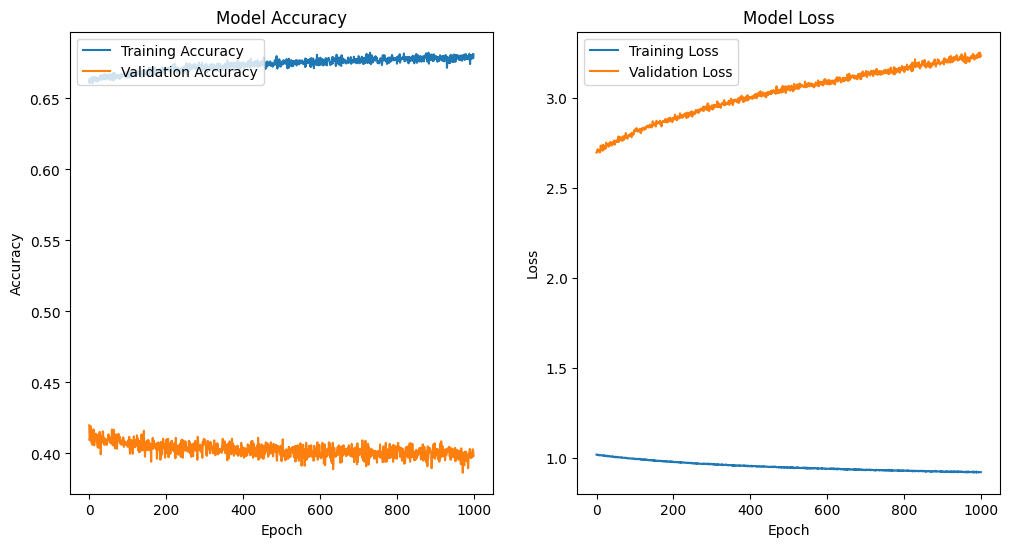

In [110]:
import pickle
import matplotlib.pyplot as plt

# Load the history object
with open('/content/drive/My Drive/training_history.pkl', 'rb') as file:
    history = pickle.load(file)

# Check if 'history' is a dictionary
print(type(history))  # Should output: <class 'dict'>

# Plot the training history
plt.figure(figsize=(12, 6))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history['accuracy'], label='Training Accuracy')
plt.plot(history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history['loss'], label='Training Loss')
plt.plot(history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

plt.show()
